In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
from google.colab import files

# Uploading the data
uploaded = files.upload()


In [46]:
# Creating a data frame
df = pd.read_csv('F(n).csv')

In [47]:
# Creating seperate dataframes for each D
dfs = []
max_d = df[" D"].max()
for i in range(max_d + 1):
  dfs.append(df[df[" D"] == i])

In [48]:
dfs[3]["MST weight"].values

array([6.48872e-01, 1.46341e+00, 2.60319e+00, 4.36537e+00, 7.18076e+00,
       1.06858e+01, 1.79341e+01, 2.78595e+01, 4.38642e+01, 6.86714e+01,
       1.07895e+02, 1.69395e+02, 2.67156e+02, 4.22219e+02, 6.67682e+02,
       1.05773e+03, 1.67637e+03, 2.65809e+03])

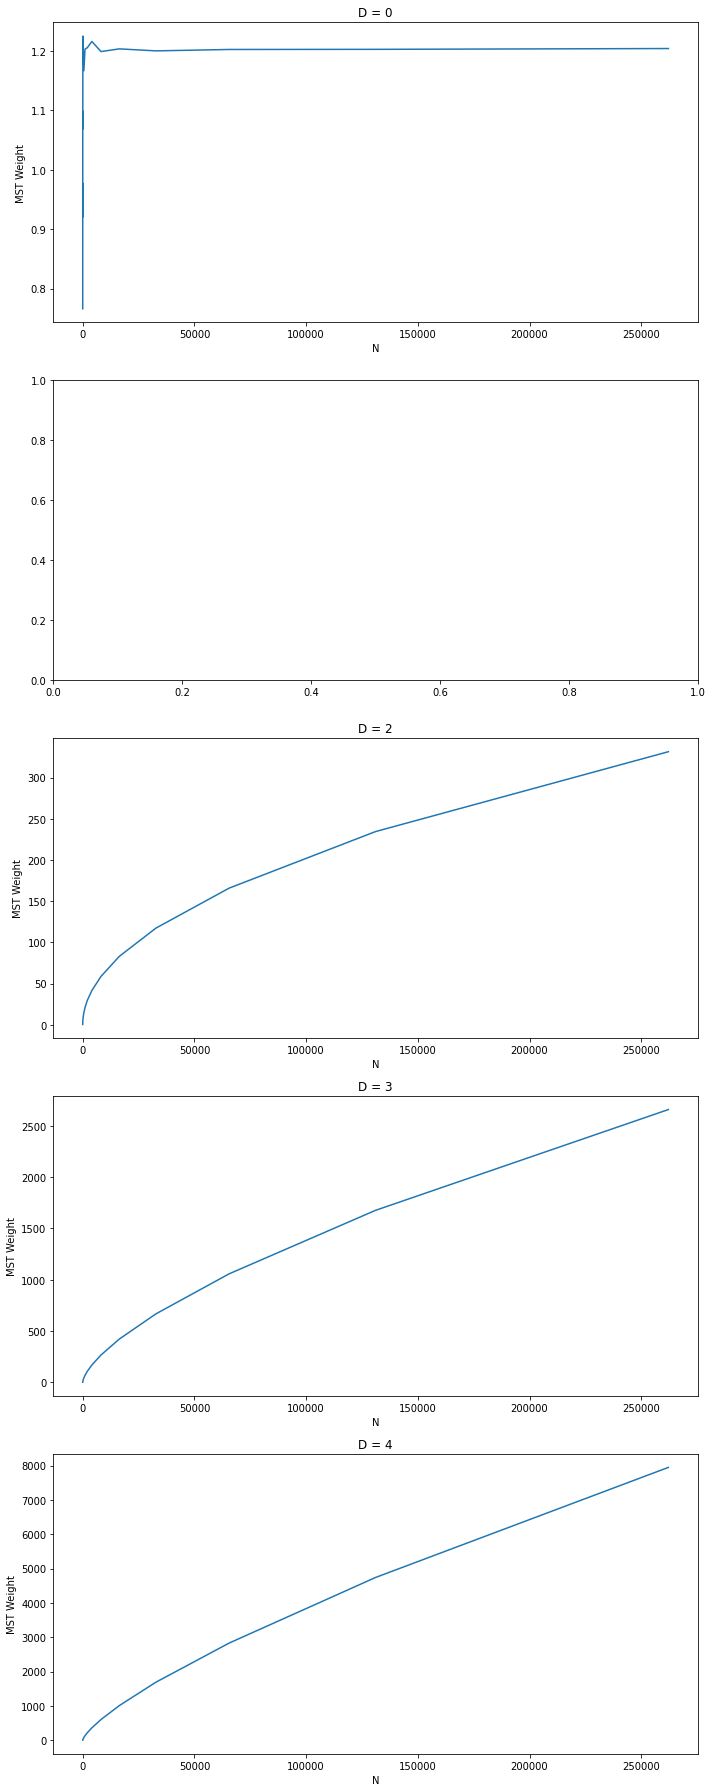

In [52]:
# Ploting data points based on the values of N, with a graph for each value of D
fig, axes = plt.subplots(max_d + 1, 1, figsize=(10, 25))
axes = axes.ravel()

for i, ax in zip(list(range(max_d + 1)), axes):
  if(i == 1) : continue
  ax.plot(dfs[i][" N"], dfs[i]["MST weight"])
  ax.set_title("D = " + str(i))
  ax.set_xlabel("N")
  ax.set_ylabel("MST Weight")

plt.tight_layout()

In [53]:
# Defining a function for chi^2
def reduced_chi_squared(params, model, xdata, ydata, deltay):
  ymodel = model(xdata, params) 

  N = len(ydata) 
  d = len(params)

  chi2 = 1/(N-d) * np.sum( (ydata - ymodel)**2 / deltay**2 )

  return chi2

In [54]:
# Calculatoing the uncertainties on your best-fit parameters, from your homework.
def calc_param_error(results):
  fiterrs = np.sqrt(np.diag(results.hess_inv*results.fun))
  for i, param in enumerate(results.x):
    print('Param %i: %f +/- %f'%(i,param,fiterrs[i]))
  return fiterrs

In [56]:
from scipy import optimize

# Defining the x-axis values which are N, the number of vertices in the graph
xs = []
for n in range(1, 19):
    xs.append(2**n )
xs = np.array(xs)

# Calculating Chi^2 value for the function f(n) = a* n^((D-1) / D) + b, where a and b constants
for d in range(5):
  if d == 1: continue

  # Defining the function f(n)
  def model(x, params):
    a, b = params
    pow = 0 if d == 0 else (d - 1) / d
    return a * x**pow + b
  #getting the MST weights for a specific D
  ys = dfs[d]["MST weight"]
  # Guess for the best fit parameters
  x0= [1.5, 2] 
  # Adjusting a and b (the constants in f(n)) to minimize Chi^2
  results = optimize.minimize(reduced_chi_squared, x0, args = (model, xs, ys, 0.8)) # optimizing a and b for best value of chi^2
  print("D = ", d, ":")
  # The best-fit parameters from out results object
  best_param = results.x
  # The uncertainties on the best-fit errors
  best_param_err = calc_param_error(results)
  # Best Chi^2 value for those parameters
  best_chi2 = results.fun 

  print(best_chi2, "\n")

D =  0 :
Param 0: 0.317730 +/- 0.123026
Param 1: 0.817730 +/- 0.123026
0.026501673898985702 

D =  2 :
Param 0: 0.647678 +/- 0.001261
Param 1: 0.095487 +/- 0.215263
0.11036397693213189 

D =  3 :
Param 0: 0.648935 +/- 0.000916
Param 1: 1.691638 +/- 1.139078
3.4458047639449894 

D =  4 :
Param 0: 0.686655 +/- 0.001461
Param 1: 5.656836 +/- 5.026814
73.80446693574842 

